<a href="https://colab.research.google.com/github/testno0/data_capstone/blob/main/capstone_data_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install times new roman font**

In [1]:
# install msttcorefonts and font-manager
!sudo apt-get install msttcorefonts font-manager -qq

In [2]:
!sudo apt-get install ttf-mscorefonts-installer

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ttf-mscorefonts-installer is already the newest version (3.6ubuntu2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [3]:
!sudo rm -rf /root/.cache/matplotlib

# **Python code**

In [76]:
import csv
import io
import statistics as stat

import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# **Upload data**

In [5]:
!ls -lah

total 20K
drwxr-xr-x 1 root root 4.0K May 20 15:03 .
drwxr-xr-x 1 root root 4.0K May 20 15:01 ..
drwxr-xr-x 4 root root 4.0K May 17 13:38 .config
-rw-r--r-- 1 root root 2.2K May 20 15:03 data_1.csv
drwxr-xr-x 1 root root 4.0K May 17 13:39 sample_data


In [6]:
raw_data = files.upload()

Saving data_1.csv to data_1 (1).csv


# **`matplotlib` configuration**

In [115]:
plt.rcParams["font.family"] = "Times New Roman"
meanpointprops = dict(
    marker="D", markeredgecolor="black", markerfacecolor="firebrick"
)

# **Data analysis**

In [8]:
data = pd.read_csv(
    io.StringIO(
        raw_data["data_1.csv"].decode("utf-8")
    ),
    sep=",",
    header=None,
    skiprows=1
)
print(data)

            0         1
0   -0.119639  0.482810
1   -0.031462  0.547402
2   -0.027956  0.542971
3   -0.028051  0.485597
4   -0.027122  0.504593
..        ...       ...
101  0.457201       NaN
102  0.446189       NaN
103  0.454002       NaN
104  0.453136       NaN
105  0.460548       NaN

[106 rows x 2 columns]


# **Plot**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


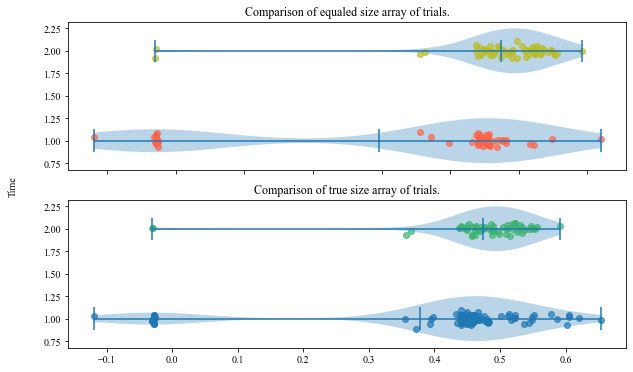

<Figure size 432x288 with 0 Axes>

In [93]:
fig, ax = plt.subplots(2, figsize=(10,6))

# match the size of two arrays
plot_data_1 = pd.DataFrame(
    {
        "True": data[0][:61],
        "False": data[1][:61]
    }
)
# retain the true sizes but remove NaN from array 2
plot_data_2 = pd.DataFrame(
    {
        "True": data[0],
        "False": data[1][:61]
    }
)

# plot 1
done_1, colors_1 = [], ["tomato", "tab:olive"]
vals_1, names_1, xs_1 = [],[],[]

for i1, col1 in enumerate(plot_data_1.columns):
    vals_1.append(plot_data_1[col1].values)
    names_1.append(col1)
    xs_1.append(np.random.normal(i1 + 1, 0.04, plot_data_1[col1].values.shape[0]))

box = ax[0].violinplot(
    vals_1, showmeans=True, vert=False
)

for x1, val1, c1 in zip(xs_1, vals_1, colors_1):
    ax[0].scatter(val1, x1, alpha=0.7, color=c1)

ax[0].set_title("Comparison of equaled size array of trials.")

# plot_2
done_2, colors_2 = [], ["tab:blue", "mediumseagreen"]
vals_2, names_2, xs_2 = [],[],[]

for i2, col2 in enumerate(plot_data_2.columns):
    vals_2.append(plot_data_2[col2].values)
    names_2.append(col2)
    xs_2.append(np.random.normal(i2 + 1, 0.04, plot_data_2[col2].values.shape[0]))

_data_ = [data[0], data[1][:61]]
box_2 = ax[1].violinplot(
    _data_, showmeans=True, vert=False
)

for x2, val2, c2 in zip(xs_2, vals_2, colors_2):
    ax[1].scatter(val2, x2, alpha=0.7, color=c2)
ax[1].set_title("Comparison of true size array of trials.")

for ax_ in ax:
    ax_.label_outer()

fig.text(0.04, 0.5, "Time", va='center', rotation='vertical')
fig_1 = plt.gcf()
plt.show()
plt.draw()
fig_1.savefig("fig_1da.png", dpi=300, bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


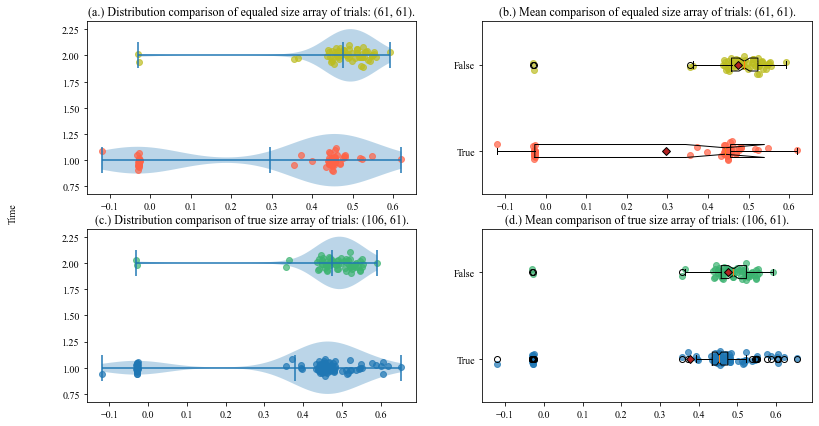

<Figure size 432x288 with 0 Axes>

In [146]:
fig, ax = plt.subplots(2, 2, figsize=(13, 7))

# match the size of two arrays
plot_data_1 = pd.DataFrame(
    {
        "True": data[0][:61],
        "False": data[1][:61]
    }
)
# retain the true sizes but remove NaN from array 2
plot_data_2 = pd.DataFrame(
    {
        "True": data[0],
        "False": data[1][:61]
    }
)

# plot 1
done_1, colors_1 = [], ["tomato", "tab:olive"]
vals_1, names_1, xs_1 = [],[],[]

for i1, col1 in enumerate(plot_data_1.columns):
    vals_1.append(plot_data_1[col1].values)
    names_1.append(col1)
    xs_1.append(np.random.normal(i1 + 1, 0.04, plot_data_1[col1].values.shape[0]))

box = ax[0, 0].violinplot(
    vals_1, showmeans=True, vert=False
)

bbox = ax[0, 1].boxplot(
    vals_1, notch=True,
    showmeans=True, 
    vert=False, 
    labels=["True", "False"],
    meanprops=meanpointprops
)

for x1, val1, c1 in zip(xs_1, vals_1, colors_1):
    ax[0, 0].scatter(val1, x1, alpha=0.7, color=c1)

for x1, val1, c1 in zip(xs_1, vals_1, colors_1):
    ax[0, 1].scatter(val1, x1, alpha=0.7, color=c1)

ax[0, 0].set_title("(a.) Distribution comparison of equaled size array of trials: (61, 61).")
ax[0, 1].set_title("(b.) Mean comparison of equaled size array of trials: (61, 61).")

# plot_2
done_2, colors_2 = [], ["tab:blue", "mediumseagreen"]
vals_2, names_2, xs_2 = [],[],[]

for i2, col2 in enumerate(plot_data_2.columns):
    vals_2.append(plot_data_2[col2].values)
    names_2.append(col2)
    xs_2.append(np.random.normal(i2 + 1, 0.04, plot_data_2[col2].values.shape[0]))

_data_ = [data[0], data[1][:61]]
box_2 = ax[1, 0].violinplot(
    _data_, showmeans=True, vert=False
)

# box plot
bbox_2 = ax[1, 1].boxplot(
    _data_, notch=True,
    showmeans=True,
    vert=False,
    labels=["True", "False"],
    meanprops=meanpointprops
)

for x2, val2, c2 in zip(xs_2, vals_2, colors_2):
    ax[1, 0].scatter(val2, x2, alpha=0.7, color=c2)

for x2, val2, c2 in zip(xs_2, vals_2, colors_2):
    ax[1, 1].scatter(val2, x2, alpha=0.7, color=c2)

ax[1, 0].set_title("(c.) Distribution comparison of true size array of trials: (106, 61).")
ax[1, 1].set_title("(d.) Mean comparison of true size array of trials: (106, 61).")

fig.text(0.04, 0.5, "Time", va='center', rotation='vertical')
fig_1 = plt.gcf()
plt.show()
plt.draw()
fig_1.savefig("fig_1da.png", dpi=300, bbox_inches="tight")

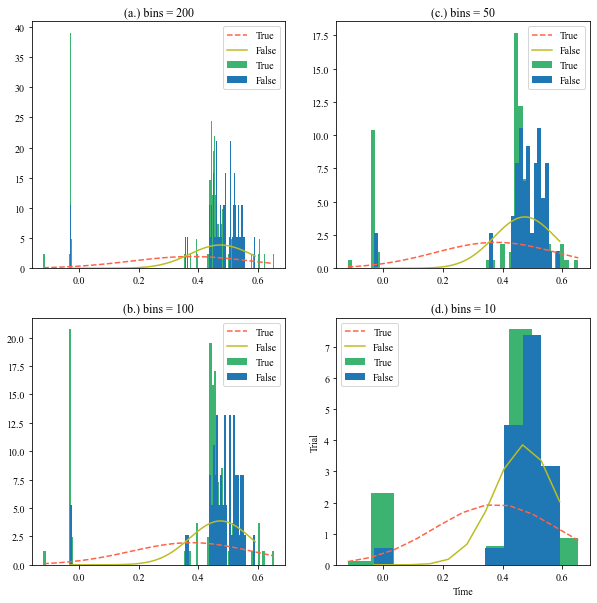

<Figure size 432x288 with 0 Axes>

In [149]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sigma_1, mean_1 = stat.stdev(data[0]), stat.mean(data[0])
sigma_2, mean_2 = stat.stdev(data[1][:61]), stat.mean(data[1][:61])
x_1 = mean_1+sigma_1*np.random.randn(437)
x_2 = mean_2+sigma_1*np.random.randn(437)

# -----------------------------------------------------------------------------
# main plot
n_11, bins_11, patches_11 = ax[0, 0].hist(
    data[0], bins=200, color="mediumseagreen", label="True", density=1
)
n_21, bins_21, patches_21 = ax[0, 0].hist(
    data[1], bins=200, color="tab:blue", label="False", density=1
)

y_11 = (
    (1/(np.sqrt(2*np.pi)*sigma_1)) * np.exp(
        -0.5*(1/sigma_1 * (bins_11-mean_1))**2
    )
)
y_21 = (
    (1/(np.sqrt(2*np.pi)*sigma_2)) * np.exp(
        -0.5 * (1/sigma_2*(bins_21-mean_2))**2
    )
)

ax[0, 0].plot(bins_11, y_11, "--", color="tomato", label="True")
ax[0, 0].plot(bins_21, y_21, "-", color="tab:olive", label="False")
ax[0, 0].set_title("(a.) bins = 200")

# -----------------------------------------------------------------------------
# second plot
n_12, bins_12, patches_12 = ax[1, 0].hist(
    data[0], bins=100, color="mediumseagreen", label="True", density=1
)
n_22, bins_22, patches_22 = ax[1, 0].hist(
    data[1], bins=100, color="tab:blue", label="False", density=1
)

y_12 = (
    (1/(np.sqrt(2*np.pi)*sigma_1)) * np.exp(
        -0.5*(1/sigma_1 * (bins_12-mean_1))**2
    )
)
y_22 = (
    (1/(np.sqrt(2*np.pi)*sigma_2)) * np.exp(
        -0.5 * (1/sigma_2*(bins_22-mean_2))**2
    )
)

ax[1, 0].plot(bins_12, y_12, "--", color="tomato", label="True")
ax[1, 0].plot(bins_22, y_22, "-", color="tab:olive", label="False")
ax[1, 0].set_title("(b.) bins = 100")
# -----------------------------------------------------------------------------
# third plot
n_13, bins_13, patches_13 = ax[0, 1].hist(
    data[0], bins=50, color="mediumseagreen", label="True", density=1
)
n_23, bins_23, patches_23 = ax[0, 1].hist(
    data[1], bins=50, color="tab:blue", label="False", density=1
)

y_13 = (
    (1/(np.sqrt(2*np.pi)*sigma_1)) * np.exp(
        -0.5*(1/sigma_1 * (bins_13-mean_1))**2
    )
)
y_23 = (
    (1/(np.sqrt(2*np.pi)*sigma_2)) * np.exp(
        -0.5 * (1/sigma_2*(bins_23-mean_2))**2
    )
)

ax[0, 1].plot(bins_13, y_13, "--", color="tomato", label="True")
ax[0, 1].plot(bins_23, y_23, "-", color="tab:olive", label="False")
ax[0, 1].set_title("(c.) bins = 50")
# -----------------------------------------------------------------------------
# fourth plot
n_14, bins_14, patches_14 = ax[1, 1].hist(
    data[0], bins=10, color="mediumseagreen", label="True", density=1
)
n_24, bins_24, patches_24 = ax[1, 1].hist(
    data[1], bins=10, color="tab:blue", label="False", density=1
)

y_14 = (
    (1/(np.sqrt(2*np.pi)*sigma_1)) * np.exp(
        -0.5*(1/sigma_1 * (bins_14-mean_1))**2
    )
)
y_24 = (
    (1/(np.sqrt(2*np.pi)*sigma_2)) * np.exp(
        -0.5 * (1/sigma_2*(bins_24-mean_2))**2
    )
)

ax[1, 1].plot(bins_14, y_14, "--", color="tomato", label="True")
ax[1, 1].plot(bins_24, y_24, "-", color="tab:olive", label="False")
ax[1, 1].set_title("(d.) bins = 10")

# enable legends
ax[0, 0].legend()
ax[1, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()

# save figure
plt.ylabel("Trial")
plt.xlabel("Time")
fig_2 = plt.gcf()
plt.show()
plt.draw()
fig_2.savefig("fig_2da.png", dpi=300, bbox_inches="tight")

# **Download data**`

In [147]:
!ls -l

total 640
-rw-r--r-- 1 root root   2167 May 20 15:15 'data_1 (1).csv'
-rw-r--r-- 1 root root   2167 May 20 15:03  data_1.csv
-rw-r--r-- 1 root root 419082 May 20 16:36  fig_1da.png
-rw-r--r-- 1 root root 220530 May 20 16:34  fig_2da.png
drwxr-xr-x 1 root root   4096 May 17 13:39  sample_data


In [148]:
for i in range(2):
    files.download(f"fig_{i+1}da.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>